<a href="https://colab.research.google.com/github/SupunJayaweera/Computer_Vision_Assignment_1_3998/blob/main/Computer_Vision_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [29]:
from google.colab import files
uploaded = files.upload()


Original Image with 256 levels vs Reduced Image with 4 levels


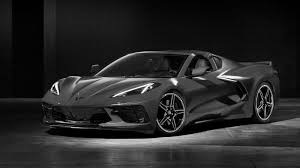

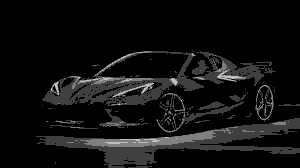

Saved reduced image as: reduced_4_levels.png


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # for image display in colab

def reduce_intensity_levels(image_path, levels):
    # Load as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to load image.")
        return

    # Apply intensity reduction
    factor = 256 // levels
    reduced = (img // factor) * factor

    # Display original and reduced images
    print(f"Original Image with 256 levels vs Reduced Image with {levels} levels")
    cv2_imshow(img)
    cv2_imshow(reduced)

    # Save the reduced image
    output_filename = f"reduced_{levels}_levels.png"
    cv2.imwrite(output_filename, reduced)
    print(f"Saved reduced image as: {output_filename}")

    # Example usage:
reduce_intensity_levels("input_image.jpg", levels=4)  # Try 2, 4, 8, 16 etc.




# Task 2

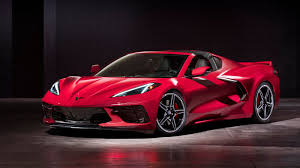

Original Image

Blurred image with kernel 3x3 saved as blurred_3x3.png


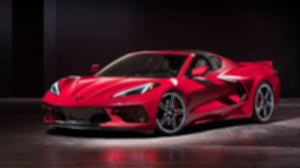

Blurred image with kernel 10x10 saved as blurred_10x10.png


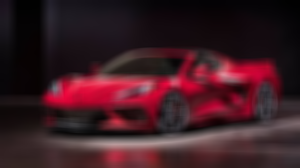

Blurred image with kernel 20x20 saved as blurred_20x20.png


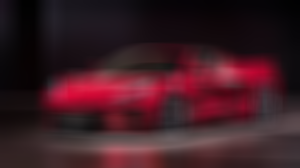

In [31]:
import cv2
from google.colab.patches import cv2_imshow

def apply_average_filter(image_path, kernel_sizes):
    img = cv2.imread(image_path)
    if img is None:
        print("Image load failed!")
        return

    cv2_imshow(img)
    print("Original Image\n")

    # Apply blur for each kernel size
    for k in kernel_sizes:
        blurred = cv2.blur(img, (k, k))
        output_name = f"blurred_{k}x{k}.png"
        cv2.imwrite(output_name, blurred)
        print(f"Blurred image with kernel {k}x{k} saved as {output_name}")
        cv2_imshow(blurred)

# Example usage
apply_average_filter("input_image.jpg", kernel_sizes=[3, 10, 20])


# Task 3

📸 Original Image:


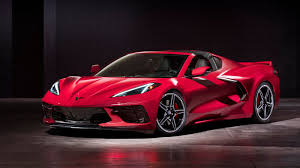


🔁 Rotated 90°:


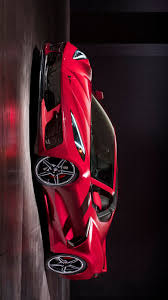


🔁 Rotated 45°:


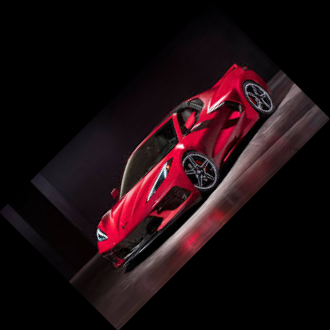

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def rotate_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image.")
        return

    print("📸 Original Image:")
    cv2_imshow(img)

    # 🔄 Rotate 90 degrees clockwise
    rotated90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite("rotated_90.png", rotated90)
    print("\n🔁 Rotated 90°:")
    cv2_imshow(rotated90)

    # 🔄 Rotate 45 degrees using affine transform
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)

    # Get rotation matrix: angle = 45 degrees, scale = 1.0
    matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

    # Calculate bounding dimensions of rotated image
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust rotation matrix to account for translation
    matrix[0, 2] += (new_w / 2) - center[0]
    matrix[1, 2] += (new_h / 2) - center[1]

    rotated45 = cv2.warpAffine(img, matrix, (new_w, new_h))
    cv2.imwrite("rotated_45.png", rotated45)
    print("\n🔁 Rotated 45°:")
    cv2_imshow(rotated45)

# Example usage
rotate_image("input_image.jpg")


# Task 4

📸 Original Image:


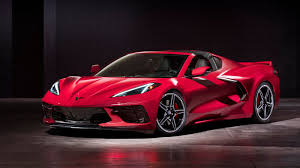


🔲 Processing block size: 3x3
Saved as reduced_3x3.png


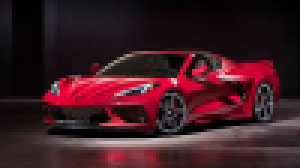


🔲 Processing block size: 5x5
Saved as reduced_5x5.png


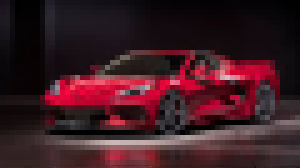


🔲 Processing block size: 7x7
Saved as reduced_7x7.png


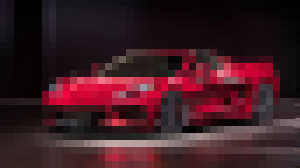

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def block_average(img, block_size):
    """Reduces resolution by averaging each non-overlapping block"""
    h, w = img.shape[:2]
    output = img.copy()

    for y in range(0, h - block_size + 1, block_size):
        for x in range(0, w - block_size + 1, block_size):
            block = img[y:y+block_size, x:x+block_size]
            avg_color = block.mean(axis=(0, 1)).astype(np.uint8)
            output[y:y+block_size, x:x+block_size] = avg_color

    return output

def reduce_resolution(image_path, block_sizes):
    img = cv2.imread(image_path)
    if img is None:
        print("Image load failed!")
        return

    print("📸 Original Image:")
    cv2_imshow(img)

    for b in block_sizes:
        print(f"\n🔲 Processing block size: {b}x{b}")
        reduced = block_average(img, b)
        output_name = f"reduced_{b}x{b}.png"
        cv2.imwrite(output_name, reduced)
        print(f"Saved as {output_name}")
        cv2_imshow(reduced)

# Example usage
reduce_resolution("input_image.jpg", block_sizes=[3, 5, 7])
